Mounted at /content/drive
1/1 [==============================] - 0s 96ms/step
Training Bernoulli Naive Bayes for EfficientNetB1...
Performance metrics for Bernoulli Naive Bayes with EfficientNetB1:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       105
           2       1.00      1.00      1.00       105
           3       1.00      1.00      1.00       105
           4       1.00      1.00      1.00       105

    accuracy                           1.00       525
   macro avg       1.00      1.00      1.00       525
weighted avg       1.00      1.00      1.00       525

Accuracy: 1.0
Sensitivity: 1.0
Precision: 1.0
F1 Score: 1.0



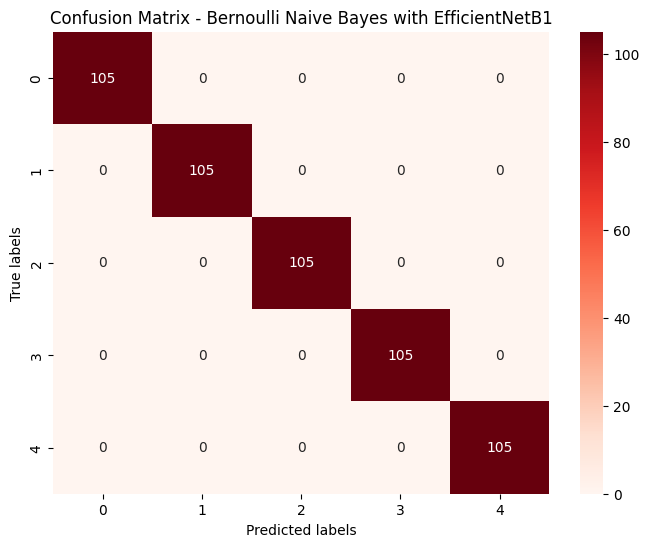

Training Multinomial Naive Bayes for EfficientNetB1...
Performance metrics for Multinomial Naive Bayes with EfficientNetB1:
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.40      0.48       105
           1       0.37      0.61      0.46       105
           2       0.44      0.24      0.31       105
           3       0.53      0.49      0.51       105
           4       0.54      0.66      0.59       105

    accuracy                           0.48       525
   macro avg       0.49      0.48      0.47       525
weighted avg       0.49      0.48      0.47       525

Accuracy: 0.4780952380952381
Sensitivity: 0.4780952380952381
Precision: 0.494080096706902
F1 Score: 0.4692167443872761



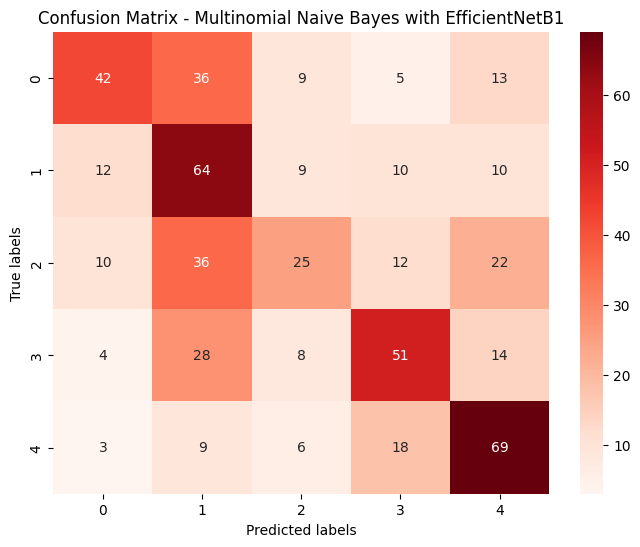

Training Complement Naive Bayes for EfficientNetB1...
Performance metrics for Complement Naive Bayes with EfficientNetB1:
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.39      0.47       105
           1       0.35      0.64      0.45       105
           2       0.72      0.12      0.21       105
           3       0.58      0.36      0.44       105
           4       0.46      0.80      0.58       105

    accuracy                           0.46       525
   macro avg       0.54      0.46      0.43       525
weighted avg       0.54      0.46      0.43       525

Accuracy: 0.46285714285714286
Sensitivity: 0.4628571428571428
Precision: 0.5425137893680756
F1 Score: 0.43347712380817355



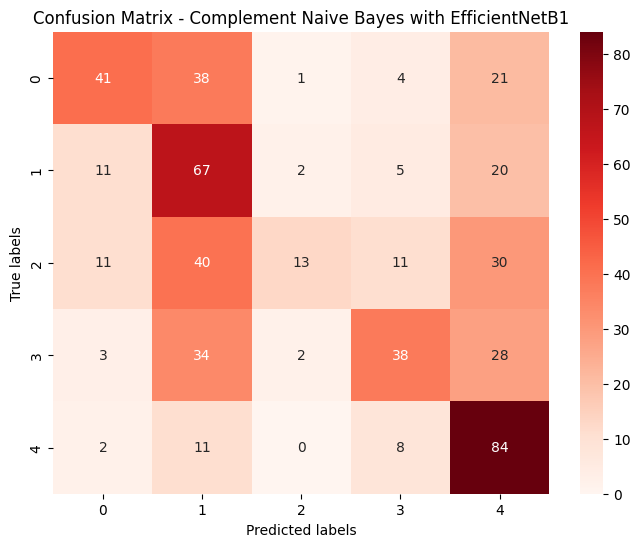

Training Gaussian Naive Bayes for EfficientNetB1...
Performance metrics for Gaussian Naive Bayes with EfficientNetB1:
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.65      0.75       105
           1       0.56      0.95      0.70       105
           2       0.89      0.69      0.77       105
           3       0.92      0.78      0.85       105
           4       0.89      0.84      0.86       105

    accuracy                           0.78       525
   macro avg       0.83      0.78      0.79       525
weighted avg       0.83      0.78      0.79       525

Accuracy: 0.780952380952381
Sensitivity: 0.780952380952381
Precision: 0.8281804386756996
F1 Score: 0.7867555141068008



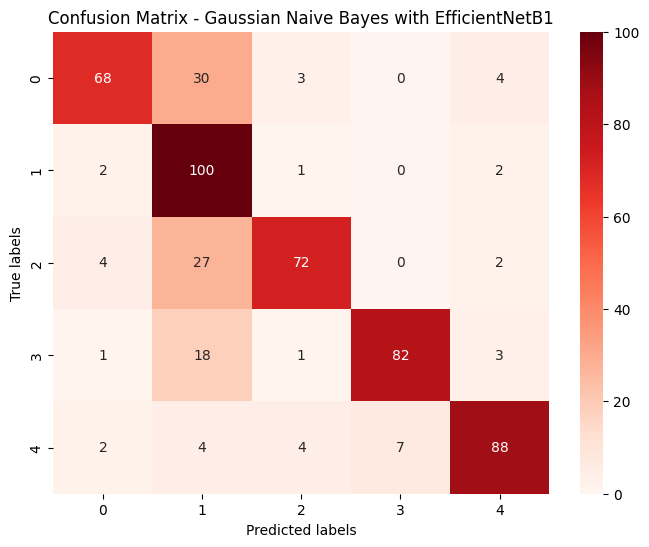

In [1]:
# Import necessary libraries
import os
import numpy as np
from keras.applications import EfficientNetB1
from keras.applications.efficientnet import preprocess_input
from keras.preprocessing import image
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/A/DR_700/Train'
test_dir = '/content/drive/MyDrive/A/DR_700/Test'

# EfficientNetB1
model_b1 = EfficientNetB1(weights='imagenet', include_top=False)

# Function to extract features from an image using EfficientNetB1
def extract_features_efficientnet_b1(img_path):
    img = image.load_img(img_path, target_size=(240, 240))  # Adjusted target size for EfficientNetB1
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model_b1.predict(img_data)
    return features

# Load images and extract features for B1
x_train_b1, y_train_b1 = [], []
x_test_b1, y_test_b1 = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_efficientnet_b1(os.path.join(class_dir, img_path))
        x_train_b1.append(features)
        y_train_b1.append(i)

# Load images and extract features for B1
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_efficientnet_b1(os.path.join(class_dir, img_path))
        x_test_b1.append(features)
        y_test_b1.append(i)

# Flatten the features for B1
x_train_flat_b1 = np.array([feature.flatten() for feature in x_train_b1])
x_test_flat_b1 = np.array([feature.flatten() for feature in x_test_b1])

# Scale the input features to the range [0, 1] for B1
scaler_b1 = MinMaxScaler()
x_train_scaled_b1 = scaler_b1.fit_transform(x_train_flat_b1)
x_test_scaled_b1 = scaler_b1.transform(x_test_flat_b1)

# Ensure non-negative values for B1
min_value_b1 = np.min(np.concatenate([x_train_scaled_b1, x_test_scaled_b1]))
x_train_scaled_non_negative_b1 = x_train_scaled_b1 - min_value_b1
x_test_scaled_non_negative_b1 = x_test_scaled_b1 - min_value_b1

# List of classifiers to try
classifiers = {
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Complement Naive Bayes": ComplementNB(),
    "Gaussian Naive Bayes": GaussianNB()
}

# Train classifiers for B1
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name} for EfficientNetB1...")
    # Train classifier
    clf.fit(x_train_scaled_non_negative_b1, y_train_b1)
    # Predict on test set
    y_pred_b1 = clf.predict(x_test_scaled_non_negative_b1)
    # Print performance metrics for B1
    print(f'Performance metrics for {clf_name} with EfficientNetB1:')
    print('Classification Report:')
    print(classification_report(y_test_b1, y_pred_b1))
    # Additional performance metrics
    accuracy_b1 = metrics.accuracy_score(y_test_b1, y_pred_b1)
    sensitivity_b1 = metrics.recall_score(y_test_b1, y_pred_b1, average='macro')
    precision_b1 = metrics.precision_score(y_test_b1, y_pred_b1, average='macro')
    f1_b1 = metrics.f1_score(y_test_b1, y_pred_b1, average='macro')
    print(f'Accuracy: {accuracy_b1}')
    print(f'Sensitivity: {sensitivity_b1}')
    print(f'Precision: {precision_b1}')
    print(f'F1 Score: {f1_b1}\n')
    # Plot confusion matrix
    cm_b1 = confusion_matrix(y_test_b1, y_pred_b1)
    # Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_b1, annot=True, cmap='Reds', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
    plt.title(f'Confusion Matrix - {clf_name} with EfficientNetB1')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
